In [1]:
# Import of libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.gridspec import GridSpec

#### Markowitz's efficient frontier, $p = 2$.

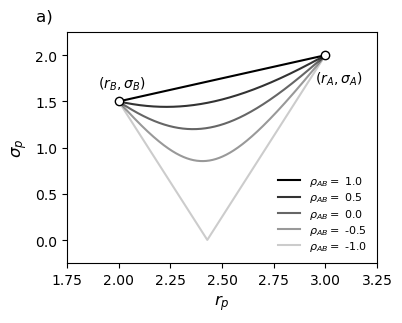

In [2]:
# Parameters
rho_ab_vals = np.linspace(1,-1, 5)
r_a = 3
s_a = 2
r_b = 2
s_b = 1.5

plt.figure(figsize=(4,3))

for i, rho_ab in enumerate(rho_ab_vals):
    x_a_0 = np.linspace(0,1,500)
    r = x_a_0*r_a + (1-x_a_0)*r_b
    s_sq = (x_a_0**2)*(s_a**2) + ((1-x_a_0)**2)*(s_b**2) + 2*x_a_0*(1-x_a_0)*s_a*s_b*rho_ab
    s = np.sqrt(s_sq)
    plt.plot(r, s, marker = 'none', linestyle = '-', color = 'black', alpha = 1 - i/5, label = r'$\rho_{AB} =$ '+str(rho_ab))

plt.scatter([r_a], [s_a], marker = 'o', facecolors='white', edgecolors= 'black', linewidth = 1, zorder=6)
plt.scatter([r_b], [s_b], marker = 'o', facecolors='white', edgecolors= 'black', linewidth = 1, zorder=6)

# Text
plt.text(r_a-0.05, s_a-0.3, r'$(r_A, \sigma_A)$')
plt.text(r_b-0.1, s_b+0.15, r'$(r_B, \sigma_B)$')
plt.gca().text(-0.1, 1.1, 'a)', transform=plt.gca().transAxes, va='top', ha='left', fontsize=12)

# Ticks
# plt.xticks([])
# plt.yticks([])
plt.xlim([1.75, 3.25])
plt.ylim([-0.25, 2.25])
plt.xlabel(r'$r_p$', fontsize=12)
plt.ylabel(r'$\sigma_p$', fontsize=12)
plt.legend(loc = 'best', frameon=False, fontsize = 8, labelspacing = 0.2)
plt.savefig('./markowtiz_eff_frontier.pdf', bbox_inches='tight')
plt.show()

#### Rebalanced portfolios, $p=2$.

In [3]:
# Parameters (individual asset)
mu_a = 0.3
sigma_a = 0.3
mu_b = 0.4
sigma_b = 0.5
rho = -0.5

# Integration parameters
N = 2*10**4  # Number of trajectories
T = 1000   # Number of timesteps
dt = 0.001 # dt
time_vec = np.linspace(0,T*dt,1000)

# List of initial proportions of investment
x_a_0_list = np.linspace(0, 1, 10)

We use the initial condition $S_{\alpha,0} = 1$ and take $x_{\alpha} = n_{\alpha,0}$ so that $\Pi_0 = 1$.

In [4]:
values_r_pi = []
values_sigma_pi2 = []

# Dynamics
for x_a_0 in x_a_0_list:
    # Propotion of B
    x_b_0 = 1 - x_a_0
    
    # Drift and volatility of portfolio (rebalancing)
    mu_p = x_a_0 * mu_a + x_b_0 * mu_b
    sigma_p = np.sqrt(x_a_0**2 * sigma_a**2 + x_b_0**2 * sigma_b**2 + 2 * x_a_0 * x_b_0 * sigma_a * sigma_b * rho)
    
    # Generate trajectories
    pi = np.zeros((N, T))
    pi[:, 0] = 1
    
    for t in range(1, T):
        pi[:, t] = pi[:, t-1] * (1 + mu_p * dt + sigma_p * np.random.normal(0, np.sqrt(dt), size=N))
    
    # Instantaneos returns
    inst_returns = (pi[:, 1:] - pi[:, :-1]) / pi[:, :-1]
    
    # Estimate drift and variance per unit time
    mu_est = np.mean(inst_returns) / dt
    sigma2_est = np.var(inst_returns) / dt
    
    values_r_pi.append(mu_est)
    values_sigma_pi2.append(sigma2_est)
    
    print(f"x_a/x_b: {x_a_0}/{x_b_0} done")

print("Done")

x_a/x_b: 0.0/1.0 done
x_a/x_b: 0.1111111111111111/0.8888888888888888 done
x_a/x_b: 0.2222222222222222/0.7777777777777778 done
x_a/x_b: 0.3333333333333333/0.6666666666666667 done
x_a/x_b: 0.4444444444444444/0.5555555555555556 done
x_a/x_b: 0.5555555555555556/0.4444444444444444 done
x_a/x_b: 0.6666666666666666/0.33333333333333337 done
x_a/x_b: 0.7777777777777777/0.22222222222222232 done
x_a/x_b: 0.8888888888888888/0.11111111111111116 done
x_a/x_b: 1.0/0.0 done
Done


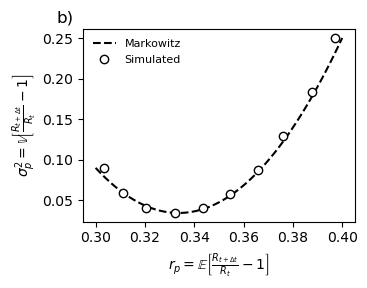

In [5]:
plt.figure(figsize=(3.5, 2.5))

# Plotting results
r_p = np.linspace(mu_a, mu_b, 1000)
sigma_p2 = (
    ((r_p - mu_b) / (mu_a - mu_b))**2 * sigma_a**2
    + ((mu_a - r_p) / (mu_a - mu_b))**2 * sigma_b**2
    + 2 * ((r_p - mu_b) / (mu_a - mu_b))
        * ((mu_a - r_p) / (mu_a - mu_b))
        * rho * sigma_a * sigma_b)

# Plotting simulated and Markowitz's efficient frontier
plt.plot(r_p, sigma_p2, color='black', linestyle='dashed', label='Markowitz')
plt.plot(values_r_pi, values_sigma_pi2, linestyle = 'none', marker='o', markerfacecolor='white', markeredgecolor='black', label='Simulated')

plt.gca().text(-0.1, 1.1, 'b)', transform=plt.gca().transAxes, va='top', ha='left', fontsize=12)
plt.xlabel(r'$r_p = \mathbb{E}\left[\frac{R_{t+\Delta t}}{R_{t}} - 1\right]$')
plt.ylabel(r'$\sigma_p^2 = \mathbb{V}\left[\frac{R_{t+\Delta t}}{R_{t}} - 1\right]$')
plt.legend(frameon=False, fontsize=8)
plt.show()

The same thing can be done for multiple values of $\rho_{AB}$ at the same time.

In [6]:
# Parameters (individual asset)
mu_a = 0.3
sigma_a = 0.3
mu_b = 0.4
sigma_b = 0.5

# Integration parameters
N = 2*10**4  # Number of trajectories
T = 1000   # Number of timesteps
dt = 0.001 # dt
time_vec = np.linspace(0,T*dt,1000)

# List of initial proportions of investment
x_a_0_list = np.linspace(0, 1, 10)
rho_list = [-0.75, -0.5, 0, 0.5]

In [7]:
# Useful for later
r_p = np.linspace(mu_a, mu_b, 1000)
values_r_pi_mat = []      # Results for each rho
values_sigma_pi2_mat = [] # Results for each rho
sigma2_markowitz_mat = []

for i, rho in enumerate(rho_list):
    # Keep values of return and variance
    values_r_pi = []
    values_sigma_pi2 = []
    
    # Dynamics
    for x_a_0 in x_a_0_list:
        # Propotion of B
        x_b_0 = 1 - x_a_0
        
        # Drift and volatility of portfolio (rebalancing)
        mu_p = x_a_0 * mu_a + x_b_0 * mu_b
        sigma_p = np.sqrt(x_a_0**2 * sigma_a**2 + x_b_0**2 * sigma_b**2 + 2 * x_a_0 * x_b_0 * sigma_a * sigma_b * rho)
        
        # Generate trajectories
        pi = np.zeros((N, T))
        pi[:, 0] = 1
        
        for t in range(1, T):
            pi[:, t] = pi[:, t-1] * (1 + mu_p * dt + sigma_p * np.random.normal(0, np.sqrt(dt), size=N))
        
        # Instantaneos returns
        inst_returns = (pi[:, 1:] - pi[:, :-1]) / pi[:, :-1]
        
        # Estimate drift and variance per unit time
        mu_est = np.mean(inst_returns) / dt
        sigma2_est = np.var(inst_returns) / dt
        
        values_r_pi.append(mu_est)
        values_sigma_pi2.append(sigma2_est)
        
        #print(f"x_a/x_b: {x_a_0}/{x_b_0} done")

    # Append data of the simulation
    values_r_pi_mat.append(values_r_pi)
    values_sigma_pi2_mat.append(values_sigma_pi2)

    # The theory for the plots later
    sigma_p2 = (
        ((r_p - mu_b) / (mu_a - mu_b))**2 * sigma_a**2
        + ((mu_a - r_p) / (mu_a - mu_b))**2 * sigma_b**2
        + 2 * ((r_p - mu_b) / (mu_a - mu_b))
            * ((mu_a - r_p) / (mu_a - mu_b))
            * rho * sigma_a * sigma_b)
    sigma2_markowitz_mat.append(sigma_p2)
    
    print(f"Rho: {rho} ({i+1}/{len(rho_list)}) done")

Rho: -0.75 (1/4) done
Rho: -0.5 (2/4) done
Rho: 0 (3/4) done
Rho: 0.5 (4/4) done


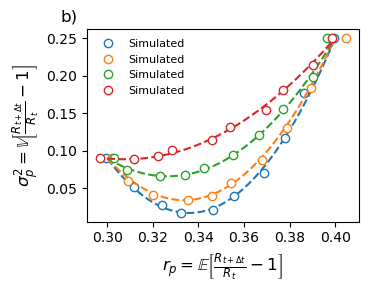

In [8]:
plt.figure(figsize=(3.5, 2.5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i in range(len(sigma2_markowitz_mat)):
    plt.plot(r_p, sigma2_markowitz_mat[i], color=colors[i], linestyle='dashed')
    plt.plot(values_r_pi_mat[i], values_sigma_pi2_mat[i], linestyle = 'none', marker='o', markerfacecolor='white', markeredgecolor=colors[i], label='Simulated')

plt.gca().text(-0.1, 1.1, 'b)', transform=plt.gca().transAxes, va='top', ha='left', fontsize=12)
plt.xlabel(r'$r_p = \mathbb{E}\left[\frac{R_{t+\Delta t}}{R_{t}} - 1\right]$', fontsize=12)
plt.ylabel(r'$\sigma_p^2 = \mathbb{V}\left[\frac{R_{t+\Delta t}}{R_{t}} - 1\right]$', fontsize=12)
plt.legend(frameon=False, fontsize=8)
plt.savefig('./rebalanced_portfolio.pdf', bbox_inches='tight')
plt.show()

#### Buy and hold portfolios, $p = 2$.

The value of the portfolio is $n_A S_a + n_B S_b$ with an initial investment of $n_A S_{A,0} + n_B S_{B,0} = \textit{cte}$. Fixing $S_{A,0}, S_{B,0} = 1$ for practical use then $n_A + n_B = N$ where $N$ is the total number of assets bought. Thus, the proportions become,
\begin{align}
    x_{\alpha,0} = \frac{n_{\alpha} S_{\alpha,0}}{\sum_{\beta = 1}^{p} n_{\beta} S_{\beta,0}} = \frac{n_{\alpha}}{N},
\end{align}
since we set $S_{\alpha,0} = 1$ for all $\alpha = 1$ and thus $\sum_{\beta} n_{\beta}S_{\beta,0} = \sum_{\beta}n_{\beta} \equiv N$, remember $N = n_1 + n_2 + \dots n_p$.

In [9]:
# Parameters 
mu_a = 0.2
var_a = 0.3
sigma_a = np.sqrt(var_a)
mu_b = 0.3
var_b = 0.5
sigma_b = np.sqrt(var_b)

N = 2*10**4  # Number of trajectories
T = 1000   # Number of timesteps
dt = 0.001 # dt

N_inv = 100 # Number of total investment
rho = -0.5   # Correlation of the assets

values_r_p = []
values_s_p2 = []

for n_a in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # Proportion of investment
    n_b = N_inv - n_a
    
    # Generation of trajectories
    s_a = np.zeros((N, T)) # Generating the arrows
    s_a[:,0] = 1 # initial condition
    s_b = np.zeros((N, T)) # Generating the arrows
    s_b[:,0] = 1 # initial condition
    
    # Integration of dynamics
    for t in range(1,T):
        z1 = np.random.normal(0, 1, size=N)
        z2 = np.random.normal(0, 1, size=N)

        s_a[:, t] = s_a[:, t-1] * np.exp( (mu_a - 0.5 * sigma_a**2) * dt + sigma_a * np.sqrt(dt) * z1 )
        s_b[:, t] = s_b[:, t-1] * np.exp( (mu_b - 0.5 * sigma_b**2) * dt + sigma_b * np.sqrt(dt) * (rho * z1 + np.sqrt(1 - rho**2) * z2) )

    # Portfolio
    p_t = n_a*s_a + n_b*s_b 
    returns_p_t = (p_t[:,-1] - p_t[:,0])/p_t[:,0]
    
    avg_return_p_t = np.mean(returns_p_t)
    st_dev_p_t = np.std(returns_p_t)
    values_r_p.append(avg_return_p_t)
    values_s_p2.append(st_dev_p_t**2)

    print(f"n_a/nb: {n_a}/{n_b} done")
    
r_R_a = np.exp(mu_a*T*dt) -1
var_R_a = (np.exp(var_a*T*dt) -1)*np.exp(2*mu_a*T*dt)
r_R_b = np.exp(mu_b*T*dt) -1
var_R_b = (np.exp(var_b*T*dt) -1)*np.exp(2*mu_b*T*dt)

print(f"Average return of asset a/b = e^muT -1: {r_R_a}/{r_R_b}")
print(f"Variance of return of asset a/b = (e^(sigma^2T) -1)e^(2muT): {var_R_a}/{var_R_b}")

n_a/nb: 0/100 done
n_a/nb: 10/90 done
n_a/nb: 20/80 done
n_a/nb: 30/70 done
n_a/nb: 40/60 done
n_a/nb: 50/50 done
n_a/nb: 60/40 done
n_a/nb: 70/30 done
n_a/nb: 80/20 done
n_a/nb: 90/10 done
n_a/nb: 100/0 done
Average return of asset a/b = e^muT -1: 0.22140275816016985/0.3498588075760032
Variance of return of asset a/b = (e^(sigma^2T) -1)e^(2muT): 0.5219280098292063/1.182047223555924


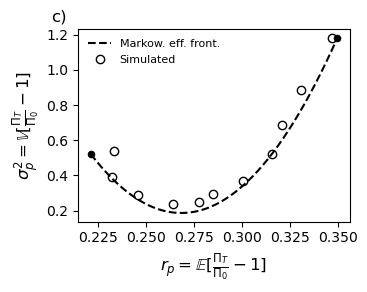

In [10]:
fig = plt.figure(figsize=(3.5, 2.5))

# Parabola in rp, s_p^2 coming from theory
r_p = np.linspace(r_R_a, r_R_b, 1000)
sigma_p2 = ( ((r_p - r_R_b)/(r_R_a - r_R_b))**2 * var_R_a 
            + ((r_R_a - r_p)/(r_R_a - r_R_b))**2 * var_R_b 
            + 2 * ((r_p - r_R_b)/(r_R_a - r_R_b)) * ((r_R_a - r_p)/(r_R_a - r_R_b)) * rho * np.sqrt(var_R_a) * np.sqrt(var_R_b) )

plt.plot(r_p, sigma_p2, color = 'black', linestyle = 'dashed', label = r'Markow. eff. front.')
plt.plot(values_r_p, values_s_p2, linestyle = 'none', marker = 'o', markerfacecolor='none', markeredgecolor='black', label=r'Simulated')

plt.scatter([r_R_a],[var_R_a], s=20, color = 'black')
plt.scatter([r_R_b],[var_R_b], s=20, color = 'black')

plt.gca().text(-0.1, 1.1, 'c)', transform=plt.gca().transAxes, va='top', ha='left', fontsize=12)
plt.xlabel(r'$r_p = \mathbb{E}[ \frac{\Pi_T}{\Pi_0} - 1]$', fontsize=12)
plt.ylabel(r'$\sigma_p^2 = \mathbb{V}[ \frac{\Pi_T}{\Pi_0} - 1]$', fontsize=12)
plt.legend(loc='best', frameon=False, fontsize=8)
plt.savefig('./buy-and-hold_portfolio.pdf', bbox_inches='tight')
plt.show()

#### Testing the CAPM.

In [11]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

import datetime as dt
import pandas as pd

In [12]:
assets = ['GOOGL', 'AAPL']
market_proxy = '^GSPC'

tickers = assets + [market_proxy]

# Download data
data = yf.download(tickers, start='2015-01-01', end='2024-01-01', auto_adjust=True)['Close']

[*********************100%***********************]  3 of 3 completed


In [13]:
data

Ticker,AAPL,GOOGL,^GSPC
Date,,,
2015-01-02,24.237556,26.278946,2058.199951
2015-01-05,23.554741,25.778225,2020.579956
2015-01-06,23.556961,25.142036,2002.609985
2015-01-07,23.887276,25.068092,2025.900024
2015-01-08,24.805082,25.155434,2062.139893
...,...,...,...
2023-12-22,191.788773,140.428970,4754.629883
2023-12-26,191.243912,140.458725,4774.750000
2023-12-27,191.342957,139.317337,4781.580078


In [14]:
month_filtered = data.resample('M').last() # take the last of each month
return_monthly = month_filtered.pct_change().dropna() # Compute relative changes, drop the na's at the begining

return_monthly

Ticker,AAPL,GOOGL,^GSPC
Date,,,
2015-02-28,0.100777,0.046656,0.054893
2015-03-31,-0.031372,-0.014095,-0.017396
2015-04-30,0.005786,-0.010691,0.008521
2015-05-31,0.045339,-0.006287,0.010491
2015-06-30,-0.037228,-0.009682,-0.021012
...,...,...,...
2023-08-31,-0.042384,0.025994,-0.017716
2023-09-30,-0.088678,-0.038995,-0.048719
2023-10-31,-0.002570,-0.051811,-0.021980


Risk free rate obtained through EEUU treasury bills.

In [15]:
data_treasury = yf.download(
    '^IRX',  # 13-week T-bill proxy 
    start=return_monthly.index.min(), end=return_monthly.index.max(), auto_adjust=True)['Close']

reshaped_data_treasury = data_treasury.resample('M').last() / 100 / 12
rfr = reshaped_data_treasury.reindex(return_monthly.index).fillna(method='ffill')

rfr

[*********************100%***********************]  1 of 1 completed


Ticker,^IRX
Date,
2015-02-28,NaN
2015-03-31,0.000021
2015-04-30,0.000004
2015-05-31,0.000003
2015-06-30,0.000008
...,...
2023-08-31,0.004415
2023-09-30,0.004417
2023-10-31,0.004433


We now compute the excess return

In [16]:
# return_monthly["Excess"]
columns = list(return_monthly.columns.values)
excess_return_monthly = return_monthly.copy()

for column in columns:
    excess_return_monthly[f'Excess {column}'] = return_monthly[column] - rfr['^IRX']

# Drop NaNs
excess_return_monthly = excess_return_monthly.dropna()

excess_return_monthly

Ticker,AAPL,GOOGL,^GSPC,Excess AAPL,Excess GOOGL,Excess ^GSPC
Date,,,,,,
2015-03-31,-0.031372,-0.014095,-0.017396,-0.031393,-0.014115,-0.017417
2015-04-30,0.005786,-0.010691,0.008521,0.005782,-0.010695,0.008517
2015-05-31,0.045339,-0.006287,0.010491,0.045337,-0.006289,0.010489
2015-06-30,-0.037228,-0.009682,-0.021012,-0.037236,-0.009691,-0.021020
2015-07-31,-0.032927,0.217502,0.019742,-0.032975,0.217454,0.019694
...,...,...,...,...,...,...
2023-08-31,-0.042384,0.025994,-0.017716,-0.046799,0.021579,-0.022131
2023-09-30,-0.088678,-0.038995,-0.048719,-0.093095,-0.043412,-0.053136
2023-10-31,-0.002570,-0.051811,-0.021980,-0.007003,-0.056244,-0.026413


Scatter plot showcases the excess returns of both the market and each individual asset. Covariance is computed and the prediction of the expected excess returns are displayed.

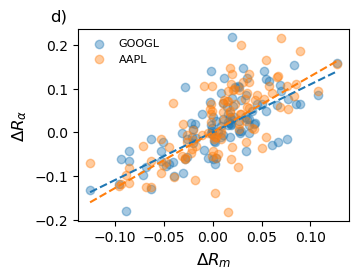

In [17]:
plt.figure(figsize=(3.5,2.5))

for asset in assets:
    excess_R_asset = np.array(list(excess_return_monthly[f"Excess {asset}"]))
    excess_market = np.array(list(excess_return_monthly[f'Excess {market_proxy}']))
    plt.scatter(excess_market, excess_R_asset, marker = 'o', alpha = 0.4, label = f'{asset}')

    # CAPM
    beta_alpha = np.cov(excess_R_asset, excess_market)[0,1]/(np.var(excess_market))
    range = np.linspace(np.min(excess_market), np.max(excess_market), 1000)
    capm_th = beta_alpha*range
    plt.plot(range, capm_th, marker = 'none', linestyle = '--')

plt.gca().text(-0.1, 1.1, 'd)', transform=plt.gca().transAxes, va='top', ha='left', fontsize=12)
plt.xlabel(r'$\Delta R_m$', fontsize=12)
plt.ylabel(r'$\Delta R_{\alpha}$', fontsize=12)
plt.legend(loc='best', frameon=False, fontsize=8)
plt.savefig('./testing_capm.pdf', bbox_inches='tight')
plt.show()